In [1]:
"""
Used for ploting csv data
"""

'\nUsed for ploting csv data\n'

In [2]:
# imports
import time
import datetime
import pandas as pd

In [26]:
# Read in csv's
list_of_csv = [
    # 'full_data__6__2017.csv', # don't use 2017 data, its not great
    'full_data__6__2018.csv',
    'full_data__6__2019.csv',
    'full_data__6__2020.csv',
    'full_data__6__2021.csv'
]

# y_17 = pd.read_csv('full_data_6_2017.csv')
# y_18 = pd.read_csv('full_data_6_2018.csv')

In [57]:
# Create arbitrary plot
def create_time_period(start, end, name):
    """
    Loops through csv until time > start and continue until end < time.
    If the end of a file is reached, open the next one.
    Save the resulting data as a new csv called 'name.csv'
    """
    start = int(time.mktime(datetime.datetime.strptime(start, "%m/%d/%Y").timetuple()))
    print(f'Start timestamp: {start}')
    end = int(time.mktime(datetime.datetime.strptime(end, "%m/%d/%Y").timetuple()))
    print(f'End timestamp: {start}')
    new_df = pd.DataFrame(columns=['timestamp','price'])

    for csv in list_of_csv:
        # read data in
        data = pd.read_csv(f'csv_files\{csv}')
        end_time_of_csv = data['timestamp'].iloc[-1]
        # Check if end_of_csv_time < start: go to next csv
        if end_time_of_csv < start:
            continue
        # Add all rows that are between start and end to new_df
        new_df = new_df.append(
            data.loc[
                (data['timestamp'] > start) &
                (data['timestamp'] < end)
            ], ignore_index=True
        )
        # check if end_of_csv_time > end: stop collecting data
        if end_time_of_csv > end:
            break
    
    # create 'price' column from avg of Open and Close
    new_df['price'] = (new_df['Open']+new_df['Close'])/2
    # Give the index a name for the csv
    new_df.index.names = ['index']
    # drop all columns we don't want
    new_df = new_df.filter(['index', 'timestamp', 'price'])
    print(new_df)
    # Save df as csv
    if not new_df.empty:
        new_df.to_csv(f'csv_files\{name}.csv')

In [63]:
create_time_period('1/2/2018','01/5/2018', 'test_2')

Start timestamp: 1514880000
End timestamp: 1514880000
        timestamp       price
index                        
0      1514880060   849.48125
1      1514880120   849.65000
2      1514880180   849.29250
3      1514880240   849.22750
4      1514880300   849.09000
...           ...         ...
4314   1515138900  1005.57875
4315   1515138960  1005.20375
4316   1515139020  1005.26625
4317   1515139080  1005.41000
4318   1515139140  1005.25750

[4319 rows x 2 columns]


Start datetime: 2018-01-02 08:01:00
End datetime:   2018-01-05 07:59:00


<AxesSubplot:xlabel='index'>

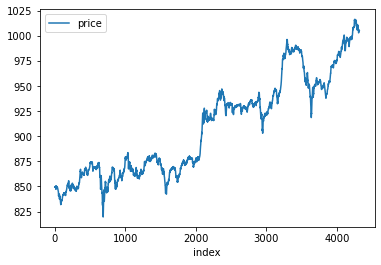

In [62]:
# Plots
# Recalibrate time variable in a new row to start at 0
# start_time = data['Time'].values[0]
# data['Cal Time'] = data['Time'].apply(lambda x: x - start_time)

# Examples
# Plot data returned
# By default x=index
# data.plot(y='To #', kind='line')
# data.plot(x='Cal Time', y=['To #', 'Plus .3%', 'Minus .3%'], kind='line')
# data.plot(x='Cal Time', y=['To #', 'Plus .3%', 'Minus .3%'], kind='line', xlim=(35000,45000))
# data.plot(x='Cal Time', y=['To #', 'Plus .3%', 'Minus .3%'], kind='line', ylim=(data['To #'].mean()*(1-.005),data['To #'].mean()*(1+.005)))

data = pd.read_csv(f'csv_files\\test_2.csv', index_col='index')
start_datetime = pd.to_datetime(data['timestamp'].iloc[0], unit='s')
end_datetime = pd.to_datetime(data['timestamp'].iloc[-1], unit='s')
print(f'Start datetime: {start_datetime}')
print(f'End datetime:   {end_datetime}')
data.plot(y='price', kind='line')